In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq, irfft
import mogptk

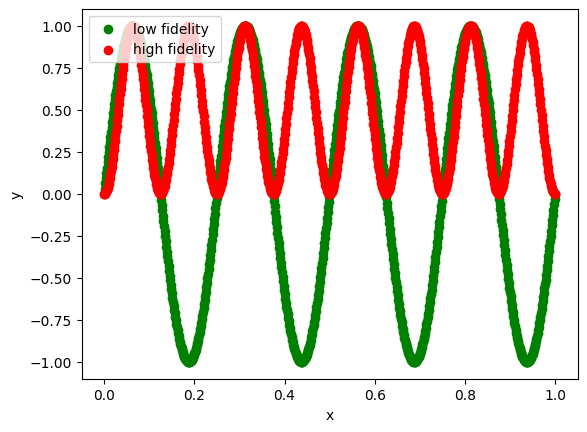

In [191]:
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x)**2

x=np.linspace(0,1,800)

points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]
plt.scatter(x, points1, c="g", label="low fidelity")
plt.scatter(x, points2, c="r", label="high fidelity")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("fourth_func.jpeg")

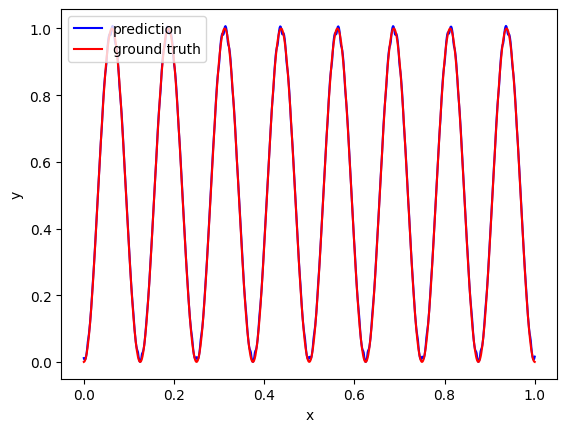

In [192]:
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(100):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))
m1_real = mogptk.LoadModel("m1_r_sin")
m2_real = mogptk.LoadModel('m2_r_sin')
m3_real = mogptk.LoadModel('m3_r_sin')
m4_real = mogptk.LoadModel('m4_r_sin')
m5_real = mogptk.LoadModel('m5_r_sin')
 

m1_im = mogptk.LoadModel("m1_i_sin")
m2_im = mogptk.LoadModel('m2_i_sin')
m3_im = mogptk.LoadModel('m3_i_sin')
m4_im = mogptk.LoadModel('m4_i_sin')
m5_im = mogptk.LoadModel('m5_i_sin')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("custom_kernel_freq.jpeg")

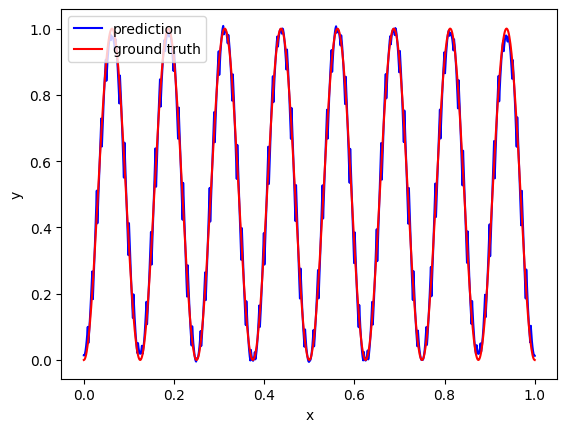

In [198]:
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(100):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

f1_real=np.delete(f1_real,1,1)
f1_real=np.delete(f1_real, 8,1)

x_train_real = torch.tensor(np.asarray(f1_real))


m1_real = mogptk.LoadModel("m1_r_sin_sm_bnse60")
m2_real = mogptk.LoadModel('m2_r_sin_sm_bnse60')
m3_real = mogptk.LoadModel('m3_r_sin_sm_bnse60')
m4_real = mogptk.LoadModel('m4_r_sin_sm_bnse60')
m5_real = mogptk.LoadModel('m5_r_sin_sm_bnse60')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_bnse60")
m2_im = mogptk.LoadModel('m2_i_sin_sm_bnse60')
m3_im = mogptk.LoadModel('m3_i_sin_sm_bnse60')
m4_im = mogptk.LoadModel('m4_i_sin_sm_bnse60')
m5_im = mogptk.LoadModel('m5_i_sin_sm_bnse60')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("bnse3_freq.jpeg")
points_freq=values

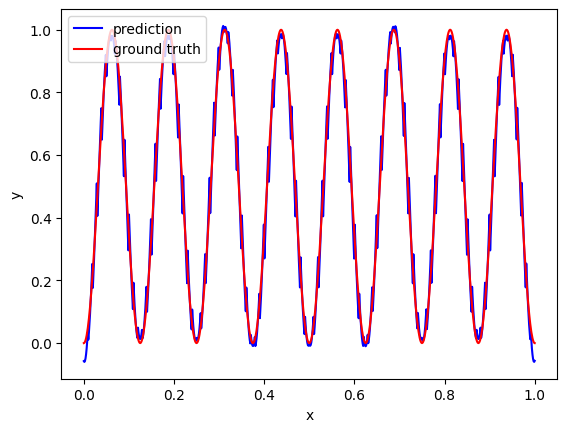

In [199]:
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(100):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm_orig_BNSE60")
m2_real = mogptk.LoadModel('m2_r_sin_sm_orig_BNSE60')
m3_real = mogptk.LoadModel('m3_r_sin_sm_orig_BNSE60')
m4_real = mogptk.LoadModel('m4_r_sin_sm_orig_BNSE60')
m5_real = mogptk.LoadModel('m5_r_sin_sm_orig_BNSE60')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_orig_BNSE60")
m2_im = mogptk.LoadModel('m2_i_sin_sm_orig_BNSE60')
m3_im = mogptk.LoadModel('m3_i_sin_sm_orig_BNSE60')
m4_im = mogptk.LoadModel('m4_i_sin_sm_orig_BNSE60')
m5_im = mogptk.LoadModel('m5_i_sin_sm_orig_BNSE60')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b",label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("bnse3_no_freq.jpeg")
#plt.plot(x, points_freq, c="g")

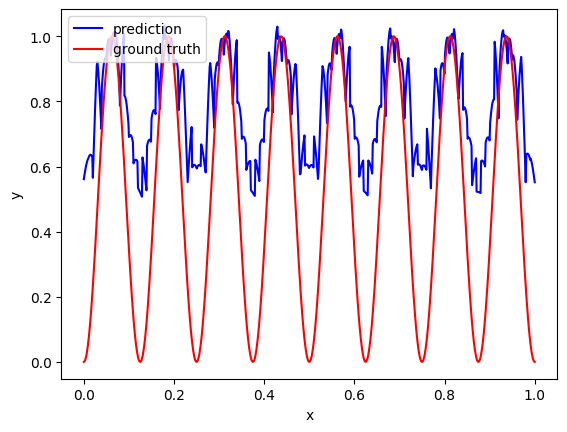

In [195]:
#sm + frequencies, no bnse
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(100):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

f1_real=np.delete(f1_real,1,1)
f1_real=np.delete(f1_real, 8,1)

x_train_real = torch.tensor(np.asarray(f1_real))


m1_real = mogptk.LoadModel("m1_r_sin_sm")
m2_real = mogptk.LoadModel('m2_r_sin_sm')
m3_real = mogptk.LoadModel('m3_r_sin_sm')
m4_real = mogptk.LoadModel('m4_r_sin_sm')
m5_real = mogptk.LoadModel('m5_r_sin_sm')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm")
m2_im = mogptk.LoadModel('m2_i_sin_sm')
m3_im = mogptk.LoadModel('m3_i_sin_sm')
m4_im = mogptk.LoadModel('m4_i_sin_sm')
m5_im = mogptk.LoadModel('m5_i_sin_sm')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("third_sm_freq.jpeg")

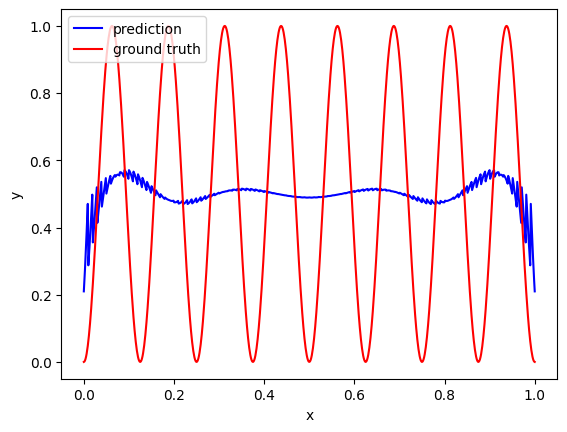

In [197]:
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(100):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm_orig")
m2_real = mogptk.LoadModel('m2_r_sin_sm_orig')
m3_real = mogptk.LoadModel('m3_r_sin_sm_orig')
m4_real = mogptk.LoadModel('m4_r_sin_sm_orig')
m5_real = mogptk.LoadModel('m5_r_sin_sm_orig')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_orig")
m2_im = mogptk.LoadModel('m2_i_sin_sm_orig')
m3_im = mogptk.LoadModel('m3_i_sin_sm_orig')
m4_im = mogptk.LoadModel('m4_i_sin_sm_orig')
m5_im = mogptk.LoadModel('m5_i_sin_sm_orig')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("third_sm_no_freq.jpeg")

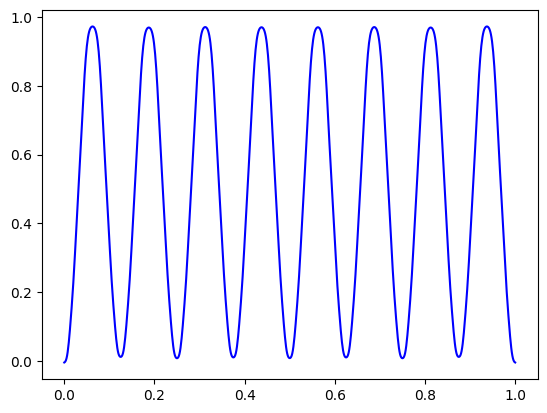

In [183]:
points_x=[]
for i,k in zip(x, points1):
    points_x.append([i,k])

x_train_real = torch.tensor(np.asarray(points_x))

m5_real = mogptk.LoadModel('m1_r_sin_sm_no_seq')
_, real, _, _ = m5_real.predict(x_train_real)
plt.plot(x, real, c="b")
#plt.plot(x,points2, c="r")


2.4286213352751638 -0.07150339207349465
-0.1249311470100003 4.982173817560328
-2.4003328267540276 2.2573260426070387
[ 2.42862134+0.j         -0.07150339+0.23352201j -0.08814669+0.09543608j
 -0.09095765+0.03944055j -0.09153822+0.j        ]


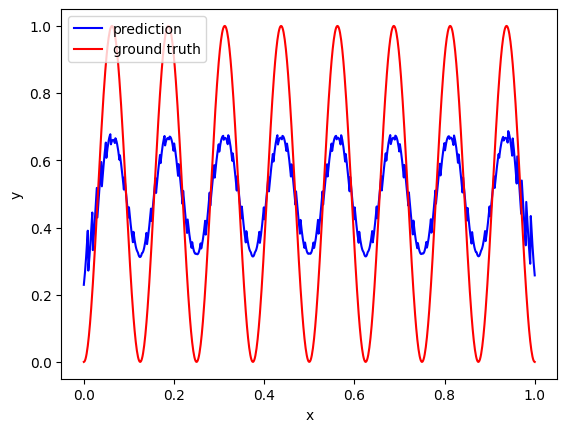

In [194]:
#reference function without frequencies
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(100):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_orig")
m2_real = mogptk.LoadModel('m2_r_sin_orig')
m3_real = mogptk.LoadModel('m3_r_sin_orig')
m4_real = mogptk.LoadModel('m4_r_sin_orig')
m5_real = mogptk.LoadModel('m5_r_sin_orig')
 

m1_im = mogptk.LoadModel("m1_i_sin_orig")
m2_im = mogptk.LoadModel('m2_i_sin_orig')
m3_im = mogptk.LoadModel('m3_i_sin_orig')
m4_im = mogptk.LoadModel('m4_i_sin_orig')
m5_im = mogptk.LoadModel('m5_i_sin_orig')
 
 
_, real, upper, lower = m1_real.predict(x_train_real)
_, real2, upper2, lower2 = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
print(real[0],real2[0])
print(upper[0],lower[0])
print(upper2[0], lower2[0])
_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)
print(result[0])

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("custom_kernel_no_freq.jpeg")


2.929941130879145
-0.8726621899658173
(100,)
[ 2.92994113-0.42233891j -0.87266219+1.40275086j  0.07183615+0.09543608j
 -0.6833747 +0.89479067j -0.24202592-1.61895944j]


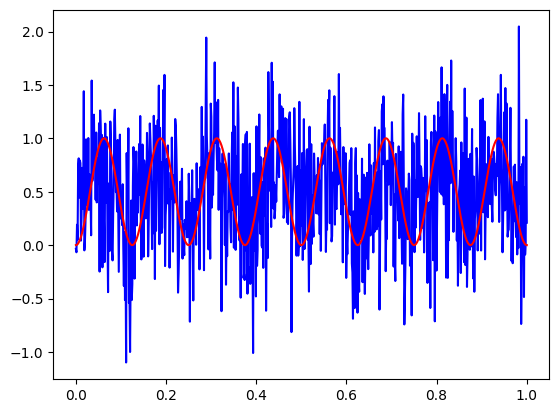

In [136]:
#reference function without frequencies
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(100):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_orig")
m2_real = mogptk.LoadModel('m2_r_sin_orig')
m3_real = mogptk.LoadModel('m3_r_sin_orig')
m4_real = mogptk.LoadModel('m4_r_sin_orig')
m5_real = mogptk.LoadModel('m5_r_sin_orig')
 

m1_im = mogptk.LoadModel("m1_i_sin_orig")
m2_im = mogptk.LoadModel('m2_i_sin_orig')
m3_im = mogptk.LoadModel('m3_i_sin_orig')
m4_im = mogptk.LoadModel('m4_i_sin_orig')
m5_im = mogptk.LoadModel('m5_i_sin_orig')
 
real = m1_real.sample(x_train_real,1)[0]
print(real[0])
real2 = m2_real.sample(x_train_real,1)[0]
print(real2[0])
real3= m3_real.sample(x_train_real,1)[0]
real4 = m4_real.sample(x_train_real,1)[0]
real5 = m5_real.sample(x_train_real,1)[0]

print(real.shape)
im = m1_im.sample(x_train_real,1)[0]
im2 = m2_im.sample(x_train_real,1)[0]
im3_ = m3_im.sample(x_train_real,1)[0]
im4 = m4_im.sample(x_train_real,1)[0]
im5 = m5_im.sample(x_train_real,1)[0]

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)
print(result[0])
values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b")
plt.plot(x,points2, c="r")

In [108]:
p=[ 2.42862134+0.j ,        -0.07150339+0.23352201j, -0.08814669+0.09543608j,
 -0.09095765+0.03944055j, -0.09153822+0.j        ]
p2=[ 1.89679506-0.26510815j, -1.05041834-0.20576364j, -1.33005877+0.09543608j,
 -1.52628596-0.01701579j, -1.49558395+0.53282033j]

In [139]:
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(100):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm_orig_BNSE60")
m2_real = mogptk.LoadModel('m2_r_sin_sm_orig_BNSE60')
m3_real = mogptk.LoadModel('m3_r_sin_sm_orig_BNSE60')
m4_real = mogptk.LoadModel('m4_r_sin_sm_orig_BNSE60')
m5_real = mogptk.LoadModel('m5_r_sin_sm_orig_BNSE60')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_orig_BNSE60")
m2_im = mogptk.LoadModel('m2_i_sin_sm_orig_BNSE60')
m3_im = mogptk.LoadModel('m3_i_sin_sm_orig_BNSE60')
m4_im = mogptk.LoadModel('m4_i_sin_sm_orig_BNSE60')
m5_im = mogptk.LoadModel('m5_i_sin_sm_orig_BNSE60')
 
 
real = m1_real.sample(x_train_real,1)[0]
real2 = m2_real.sample(x_train_real,1)[0]
real3 = m3_real.sample(x_train_real,1)[0]
real4 = m4_real.sample(x_train_real,1)[0]
real5 = m5_real.sample(x_train_real,1)[0]


im = m1_im.sample(x_train_real,1)[0]
im2 = m2_im.sample(x_train_real,1)[0]
im3 = m3_im.sample(x_train_real,1)[0]
im4 = m4_im.sample(x_train_real,1)[0]
im5 = m5_im.sample(x_train_real,1)[0]

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b")
#plt.plot(x,points2, c="r")
plt.plot(x, points_freq, c="g")

ValueError: Expected parameter covariance_matrix (Tensor of shape (100, 100)) of distribution MultivariateNormal(loc: torch.Size([100]), covariance_matrix: torch.Size([100, 100])) to satisfy the constraint PositiveDefinite(), but found invalid values:
tensor([[3.1015e-12, 3.0961e-12, 3.0907e-12,  ..., 1.6613e-12, 1.6364e-12,
         1.6115e-12],
        [3.0961e-12, 3.0918e-12, 3.0875e-12,  ..., 1.6865e-12, 1.6615e-12,
         1.6364e-12],
        [3.0907e-12, 3.0875e-12, 3.0841e-12,  ..., 1.7117e-12, 1.6865e-12,
         1.6613e-12],
        ...,
        [1.6613e-12, 1.6865e-12, 1.7117e-12,  ..., 3.0841e-12, 3.0875e-12,
         3.0907e-12],
        [1.6364e-12, 1.6615e-12, 1.6865e-12,  ..., 3.0875e-12, 3.0918e-12,
         3.0961e-12],
        [1.6115e-12, 1.6364e-12, 1.6613e-12,  ..., 3.0907e-12, 3.0961e-12,
         3.1015e-12]], dtype=torch.float64)

In [141]:
x=np.asarray([1,2,3,4,5,6,7,8])
rfft(x)

array([36.+0.j        , -4.+9.65685425j, -4.+4.j        , -4.+1.65685425j,
       -4.+0.j        ])

In [143]:
freq=rfft(x)

In [165]:
def func(j, num_points, freq):
    result=freq[0]/num_points
    i=1
    while i<= np.floor(num_points/2):
        result+=(2/num_points)*(freq[i].real*np.cos(2*np.pi*j*i/num_points)-np.sin(2*np.pi*j*i/num_points)*freq[i].imag)
        i+=1
    result+=(1/num_points)*freq[(int(num_points/2))]*np.cos(j*np.pi)
    return result    

In [177]:
func(4,8,freq)

(4+0j)

[[-5.356489143327904, 0.0, -6.611125906794289, 2.35420163044211, -18.92949584159143, 12.699225972255407, 11.232982634832211, -10.30010016476699, 3.9752798145591424, -4.317286459724464, 2.404023431832886, -2.8481270526511127, 1.7538510063870938, -2.1519676737547995, 1.4120822706831306, -1.7339676698507032, 1.207457446300332, -1.4497840102348314, 1.074317270297133, -1.2411405354951361, 0.9824968493842497, -1.079696824026637, 0.9163809938422178, -0.9498834891359612, 0.8671651672380216, -0.8423756911424158, 0.8295539499235214, -0.7512165306630876, 0.8001970175125332, -0.6724050759190976, 0.7768863148083247, -0.6031439217069554, 0.758116858095603, -0.5414113047562141, 0.7428336647906897, -0.4857046182190552, 0.730279497816718, -0.43487980427983963, 0.7198998601215563, -0.3880470049914241, 0.7112818350600371, -0.3445005800516866, 0.7041136442140212, -0.30367085094553414, 0.6981572793107362, -0.2650899896843594, 0.6932296122099448, -0.22836735078409054, 0.6891891403867934, -0.1931712436094081

ValueError: x and y must have same first dimension, but have shapes (60,) and (3,)

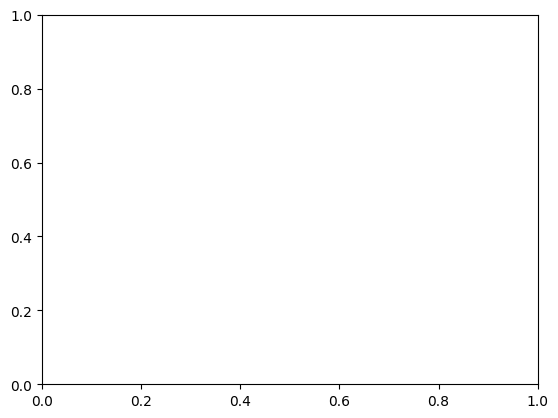

In [205]:
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x)**2


def generate_points(start,stop,num_points,subsequence):
    step = 0.01
    points_x = []
    for i in range(num_points):
        start = np.random.uniform(start, stop, 1)
        x = []

        for i in range(subsequence):
            x.append(start + step * i)

        for i in x:
            points_x.append(i[0])
    return np.asarray(points_x)


x=generate_points(0,1,3,60)
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]


f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+60])
    f1.append(points1[i:i+60])
    points.append(x[i:i+60])
    i+=60


f1_real = []
f1_imag = []

for i in range(3):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

   # real_train= np.concatenate(np.asarray(real_train), np.asarray(points[i]))
    f1_real.append(real_train)




x_train_real = torch.tensor(np.asarray(f1_real))


model=mogptk.LoadModel("m1_r_sin100")
_,real,_,_=model.predict(x_train_real)
plt.plot(points[0], real[0], c="g")

In [190]:
real

array([29.43671744, 29.86571312, 30.0592282 ])

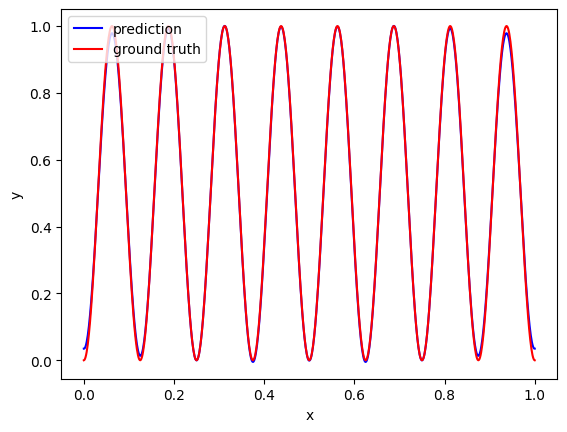

In [203]:
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x)**2

x=np.linspace(0,1,800)
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]
input=[]
for i, k in zip(x, points1):
    input.append([i,k])
    
x_train_real = torch.tensor(np.asarray(input))
model=mogptk.LoadModel("m1_r_sin_sm_bnse_one_point")
_,real, _,_=model.predict(x_train_real)
plt.plot(x, real, label="prediction", c="b")
plt.plot(x, points2, label="ground truth", c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("fone_point_sm_bnse.jpeg")

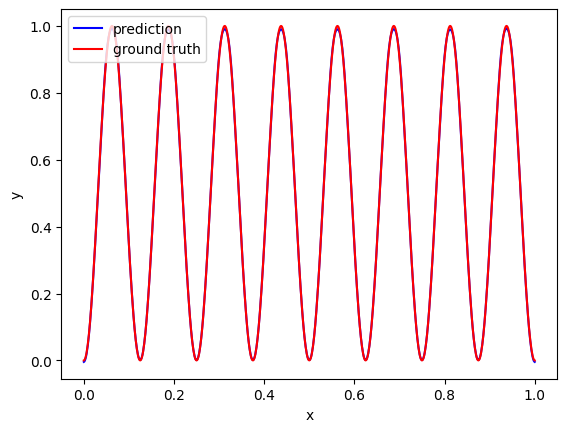

In [202]:
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x)**2

x=np.linspace(0,1,800)
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]
input=[]
for i, k in zip(x, points1):
    input.append([i,k])
    
x_train_real = torch.tensor(np.asarray(input))
model=mogptk.LoadModel("m1_r_sin_sm_orig_one_point")
_,real, _,_=model.predict(x_train_real)
plt.plot(x, real, label="prediction", c="b")
plt.plot(x, points2, label="ground truth", c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("fone_point_sm.jpeg")

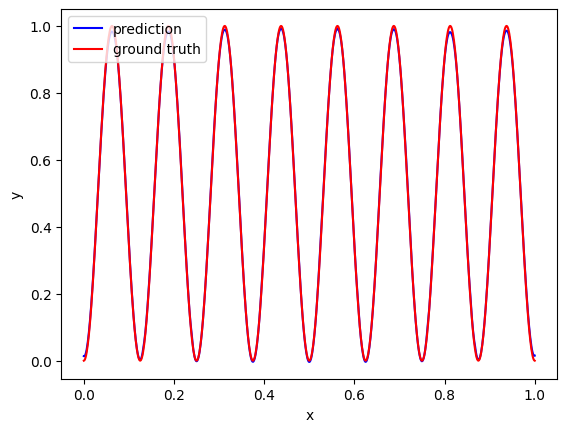

In [201]:
# experiments with original models, no frequencies
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x)**2

x=np.linspace(0,1,800)
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]
input=[]
for i, k in zip(x, points1):
    input.append([i,k])
    
x_train_real = torch.tensor(np.asarray(input))
model=mogptk.LoadModel("m1_r_sin_one_point")
_,real, _,_=model.predict(x_train_real)
plt.plot(x, real, label="prediction", c="b")
plt.plot(x, points2, label="ground truth", c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("fone_point_custom.jpeg")